# Chapter 11 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import mlba

In [3]:
example_df = mlba.load_data('TinyData.csv')

predictors = ['Fat', 'Salt']
outcome = 'Acceptance'

X = example_df[predictors]
y = example_df[outcome]
classes = sorted(y.unique())

clf = MLPClassifier(hidden_layer_sizes=[3], activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(X, y)
clf.predict(X)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
print(pd.concat([
    example_df,
    pd.DataFrame(clf.predict_proba(X), columns=classes)
], axis=1))

Intercepts
[array([0.13368043, 4.0724755 , 7.00768105]), array([14.30748673])]
Weights
[array([[ -1.30656481,  -4.20427795, -13.29587332],
       [ -0.04399728,  -4.91606922,  -6.03356987]]), array([[ -0.27348313],
       [ -9.01211574],
       [-17.63504688]])]
   Obs.  Fat  Salt Acceptance   dislike      like
0     1  0.2   0.9       like  0.000490  0.999510
1     2  0.1   0.1    dislike  0.999994  0.000006
2     3  0.2   0.4    dislike  0.999741  0.000259
3     4  0.2   0.5    dislike  0.997368  0.002632
4     5  0.4   0.5       like  0.002133  0.997867
5     6  0.3   0.8       like  0.000075  0.999925


In [4]:
import numpy as np
print(f'{clf.intercepts_[0][0]=}')
print(f'{clf.coefs_[0][0:1]=}')
output_N3 = 1/(1+np.exp(-(clf.intercepts_[0][0] + clf.coefs_[0][0][0]*0.2
                                                + clf.coefs_[0][1][0]*(0.9))))
output_N4 = 1/(1+np.exp(-(clf.intercepts_[0][1] + clf.coefs_[0][0][1]*0.2
                                                + clf.coefs_[0][1][1]*(0.9))))
output_N5 = 1/(1+np.exp(-(clf.intercepts_[0][2] + clf.coefs_[0][0][2]*0.2
                                                + clf.coefs_[0][1][2]*(0.9))))
print(f'{output_N3=:.3f}')
print(f'{output_N4=:.3f}')
print(f'{output_N5=:.3f}')
output_N6 = 1/(1+np.exp(-(clf.intercepts_[1][0] + clf.coefs_[1][0][0]*output_N3
                                                + clf.coefs_[1][1][0]*output_N4
                                                + clf.coefs_[1][2][0]*output_N5)))
print(f'{output_N6=:.4f}')

clf.intercepts_[0][0]=0.13368043174991306
clf.coefs_[0][0:1]=array([[ -1.30656481,  -4.20427795, -13.29587332]])
output_N3=0.458
output_N4=0.233
output_N5=0.253
output_N6=0.9995


In [5]:
mlba.classificationSummary(y_true=y, y_pred=clf.predict(X), class_names=classes)

Confusion Matrix (Accuracy 1.0000)

        Prediction
 Actual dislike    like
dislike       3       0
   like       0       3


In [6]:
accidents_df = mlba.load_data('accidentsnn.csv')
input_vars = ['ALCHL_I', 'PROFIL_I_R', 'VEH_INVL']

accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')

# convert the categorical data into dummy variables
# exclude the column for SUR_COND 9 = unknown
processed = pd.get_dummies(accidents_df, columns=['SUR_COND'])
processed = processed.drop(columns=['SUR_COND_9'])

outcome = 'MAX_SEV_IR'
predictors = [c for c in processed.columns if c != outcome]

# partition data
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
                                                      random_state=1)

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y.values)

# training performance (use idxmax to revert the one-hot encoding)
mlba.classificationSummary(y_true=train_y, y_pred=clf.predict(train_X))

# validation performance
mlba.classificationSummary(y_true=valid_y, y_pred=clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8664)

       Prediction
Actual   0   1   2
     0 331   0   1
     1   0 180   0
     2  30  49   8
Confusion Matrix (Accuracy 0.8550)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 119   0
     2  24  33   5


 Fitting class probabilities separately

In [7]:
accidents_df = mlba.load_data('accidentsnn.csv')
input_vars = ['ALCHL_I', 'PROFIL_I_R', 'VEH_INVL']

accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')

# convert the categorical data into dummy variables
processed = pd.get_dummies(accidents_df)
# drop the column for SUR_COND 9 = unknown
processed = processed.drop(columns=['SUR_COND_9'])

outcome = ['MAX_SEV_IR_0', 'MAX_SEV_IR_1', 'MAX_SEV_IR_2']
predictors = [c for c in processed.columns if c not in outcome]
classes = sorted(outcome)

# partition data
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y)

# training performance (use idxmax to revert the one-hot encoding)
trainPrediction = pd.DataFrame(clf.predict(train_X), columns=outcome).idxmax(axis=1)
mlba.classificationSummary(y_true=train_y.idxmax(axis=1), y_pred=trainPrediction, class_names=classes)

# validation performance
validPrediction = pd.DataFrame(clf.predict(valid_X), columns=outcome).idxmax(axis=1)
mlba.classificationSummary(y_true=valid_y.idxmax(axis=1), y_pred=validPrediction, class_names=classes)

Confusion Matrix (Accuracy 0.8731)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          332            0            0
MAX_SEV_IR_1            0          170           10
MAX_SEV_IR_2           31           35           21
Confusion Matrix (Accuracy 0.8675)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          218            0            1
MAX_SEV_IR_1            0          113            6
MAX_SEV_IR_2           24           22           16


 Grid search

In [8]:
from sklearn.model_selection import GridSearchCV

# train neural network using grid search for hyperparameter tuning
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y.values)

param_grid = {
    'hidden_layer_sizes': [[1], [2], [3], [4], [5]]
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                        param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8630672268907563
Best parameters:  {'hidden_layer_sizes': [4]}


In [9]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

  param_hidden_layer_sizes  mean_test_score  std_test_score
0                      [1]         0.844762        0.011030
1                      [2]         0.848067        0.009913
2                      [3]         0.859734        0.025691
3                      [4]         0.863067        0.024167
4                      [5]         0.856415        0.020770


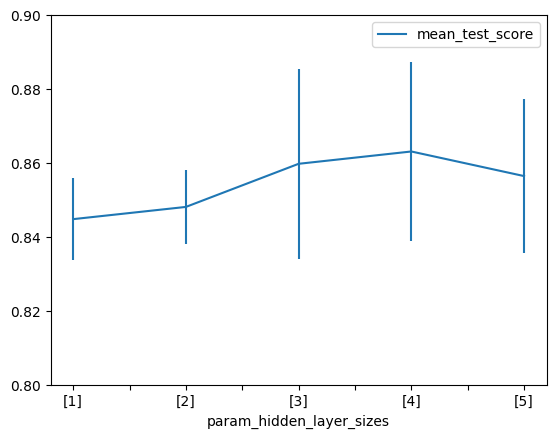

In [10]:
import matplotlib.pyplot as plt
pd.DataFrame(gridSearch.cv_results_)[display].plot(
    x='param_hidden_layer_sizes',
    y='mean_test_score', yerr='std_test_score', ylim=(0.8, 0.9))
plt.show()
%matplotlib inline

In [11]:
import keras
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# pixel values need to be scaled to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# input require an additional dimension to describe pixel values
# dimensions are (samples, row, column, pixel)
train_images = train_images.reshape(train_images.shape + (1,))
test_images = test_images.reshape(test_images.shape + (1,))

# output values need to be converted into a matrix with one-hot encoding of classes
# dimensions are (samples, classes)
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels_ohe = keras.utils.to_categorical(test_labels, 10)

In [12]:
input_shape = train_images.shape[1:]
num_classes = 10

model = keras.Sequential([
    keras.Input(input_shape),
    keras.layers.Conv2D(32, (5, 5), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax'),
])
model.summary()

2024-10-25 17:02:43.210088: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-10-25 17:02:43.210109: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2024-10-25 17:02:43.210117: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2024-10-25 17:02:43.210506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-25 17:02:43.210522: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,978 (3.86 MB)

 Trainable params: 1,011,978 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# keep a copy of the defined model to train with fewer epochs
model_cloned = keras.models.clone_model(model)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=256, epochs=50,
          validation_data=(test_images, test_labels_ohe), verbose=2)

Epoch 1/50


2024-10-25 17:02:43.943692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


235/235 - 6s - 24ms/step - accuracy: 0.7825 - loss: 0.6155 - val_accuracy: 0.8631 - val_loss: 0.3889


Epoch 2/50


235/235 - 5s - 19ms/step - accuracy: 0.8636 - loss: 0.3831 - val_accuracy: 0.8826 - val_loss: 0.3215


Epoch 3/50


235/235 - 4s - 16ms/step - accuracy: 0.8835 - loss: 0.3287 - val_accuracy: 0.8928 - val_loss: 0.2968


Epoch 4/50


235/235 - 4s - 16ms/step - accuracy: 0.8926 - loss: 0.2985 - val_accuracy: 0.8916 - val_loss: 0.2864


Epoch 5/50


235/235 - 4s - 18ms/step - accuracy: 0.9003 - loss: 0.2726 - val_accuracy: 0.9069 - val_loss: 0.2618


Epoch 6/50


235/235 - 4s - 15ms/step - accuracy: 0.9069 - loss: 0.2548 - val_accuracy: 0.9049 - val_loss: 0.2546


Epoch 7/50


235/235 - 4s - 17ms/step - accuracy: 0.9128 - loss: 0.2412 - val_accuracy: 0.9088 - val_loss: 0.2510


Epoch 8/50


235/235 - 4s - 17ms/step - accuracy: 0.9177 - loss: 0.2232 - val_accuracy: 0.9163 - val_loss: 0.2314


Epoch 9/50


235/235 - 4s - 18ms/step - accuracy: 0.9220 - loss: 0.2134 - val_accuracy: 0.9103 - val_loss: 0.2430


Epoch 10/50


235/235 - 4s - 18ms/step - accuracy: 0.9258 - loss: 0.2012 - val_accuracy: 0.9167 - val_loss: 0.2327


Epoch 11/50


235/235 - 4s - 18ms/step - accuracy: 0.9278 - loss: 0.1942 - val_accuracy: 0.9216 - val_loss: 0.2190


Epoch 12/50


235/235 - 4s - 18ms/step - accuracy: 0.9314 - loss: 0.1836 - val_accuracy: 0.9180 - val_loss: 0.2238


Epoch 13/50


235/235 - 4s - 17ms/step - accuracy: 0.9349 - loss: 0.1730 - val_accuracy: 0.9222 - val_loss: 0.2245


Epoch 14/50


235/235 - 4s - 16ms/step - accuracy: 0.9372 - loss: 0.1661 - val_accuracy: 0.9177 - val_loss: 0.2359


Epoch 15/50


235/235 - 4s - 17ms/step - accuracy: 0.9408 - loss: 0.1537 - val_accuracy: 0.9193 - val_loss: 0.2295


Epoch 16/50


235/235 - 4s - 16ms/step - accuracy: 0.9419 - loss: 0.1516 - val_accuracy: 0.9231 - val_loss: 0.2246


Epoch 17/50


235/235 - 4s - 16ms/step - accuracy: 0.9460 - loss: 0.1436 - val_accuracy: 0.9203 - val_loss: 0.2360


Epoch 18/50


235/235 - 4s - 16ms/step - accuracy: 0.9473 - loss: 0.1397 - val_accuracy: 0.9228 - val_loss: 0.2286


Epoch 19/50


235/235 - 4s - 16ms/step - accuracy: 0.9477 - loss: 0.1347 - val_accuracy: 0.9233 - val_loss: 0.2281


Epoch 20/50


235/235 - 4s - 16ms/step - accuracy: 0.9507 - loss: 0.1297 - val_accuracy: 0.9183 - val_loss: 0.2412


Epoch 21/50


235/235 - 4s - 17ms/step - accuracy: 0.9525 - loss: 0.1228 - val_accuracy: 0.9236 - val_loss: 0.2318


Epoch 22/50


235/235 - 4s - 19ms/step - accuracy: 0.9532 - loss: 0.1200 - val_accuracy: 0.9226 - val_loss: 0.2432


Epoch 23/50


235/235 - 4s - 15ms/step - accuracy: 0.9556 - loss: 0.1154 - val_accuracy: 0.9235 - val_loss: 0.2415


Epoch 24/50


235/235 - 4s - 16ms/step - accuracy: 0.9560 - loss: 0.1134 - val_accuracy: 0.9228 - val_loss: 0.2376


Epoch 25/50


235/235 - 4s - 16ms/step - accuracy: 0.9582 - loss: 0.1091 - val_accuracy: 0.9239 - val_loss: 0.2495


Epoch 26/50


235/235 - 4s - 16ms/step - accuracy: 0.9587 - loss: 0.1063 - val_accuracy: 0.9277 - val_loss: 0.2483


Epoch 27/50


235/235 - 4s - 16ms/step - accuracy: 0.9611 - loss: 0.0995 - val_accuracy: 0.9245 - val_loss: 0.2478


Epoch 28/50


235/235 - 4s - 16ms/step - accuracy: 0.9621 - loss: 0.0984 - val_accuracy: 0.9275 - val_loss: 0.2471


Epoch 29/50


235/235 - 4s - 16ms/step - accuracy: 0.9635 - loss: 0.0939 - val_accuracy: 0.9282 - val_loss: 0.2485


Epoch 30/50


235/235 - 4s - 16ms/step - accuracy: 0.9653 - loss: 0.0924 - val_accuracy: 0.9243 - val_loss: 0.2762


Epoch 31/50


235/235 - 4s - 16ms/step - accuracy: 0.9650 - loss: 0.0897 - val_accuracy: 0.9260 - val_loss: 0.2556


Epoch 32/50


235/235 - 4s - 16ms/step - accuracy: 0.9652 - loss: 0.0885 - val_accuracy: 0.9247 - val_loss: 0.2734


Epoch 33/50


235/235 - 4s - 15ms/step - accuracy: 0.9677 - loss: 0.0858 - val_accuracy: 0.9279 - val_loss: 0.2676


Epoch 34/50


235/235 - 4s - 16ms/step - accuracy: 0.9669 - loss: 0.0842 - val_accuracy: 0.9248 - val_loss: 0.2868


Epoch 35/50


235/235 - 4s - 16ms/step - accuracy: 0.9677 - loss: 0.0831 - val_accuracy: 0.9243 - val_loss: 0.2923


Epoch 36/50


235/235 - 4s - 16ms/step - accuracy: 0.9684 - loss: 0.0804 - val_accuracy: 0.9275 - val_loss: 0.2929


Epoch 37/50


235/235 - 4s - 16ms/step - accuracy: 0.9696 - loss: 0.0770 - val_accuracy: 0.9242 - val_loss: 0.3078


Epoch 38/50


235/235 - 4s - 16ms/step - accuracy: 0.9697 - loss: 0.0782 - val_accuracy: 0.9271 - val_loss: 0.2780


Epoch 39/50


235/235 - 4s - 16ms/step - accuracy: 0.9696 - loss: 0.0768 - val_accuracy: 0.9272 - val_loss: 0.2801


Epoch 40/50


235/235 - 4s - 16ms/step - accuracy: 0.9705 - loss: 0.0747 - val_accuracy: 0.9294 - val_loss: 0.2800


Epoch 41/50


235/235 - 5s - 22ms/step - accuracy: 0.9707 - loss: 0.0725 - val_accuracy: 0.9247 - val_loss: 0.3046


Epoch 42/50


235/235 - 12s - 50ms/step - accuracy: 0.9705 - loss: 0.0744 - val_accuracy: 0.9280 - val_loss: 0.3057


Epoch 43/50


235/235 - 13s - 54ms/step - accuracy: 0.9707 - loss: 0.0756 - val_accuracy: 0.9253 - val_loss: 0.2941


Epoch 44/50


235/235 - 12s - 52ms/step - accuracy: 0.9737 - loss: 0.0674 - val_accuracy: 0.9281 - val_loss: 0.3139


Epoch 45/50


235/235 - 10s - 44ms/step - accuracy: 0.9741 - loss: 0.0687 - val_accuracy: 0.9283 - val_loss: 0.2899


Epoch 46/50


235/235 - 10s - 44ms/step - accuracy: 0.9735 - loss: 0.0665 - val_accuracy: 0.9294 - val_loss: 0.3075


Epoch 47/50


235/235 - 4s - 18ms/step - accuracy: 0.9747 - loss: 0.0642 - val_accuracy: 0.9277 - val_loss: 0.3021


Epoch 48/50


235/235 - 4s - 15ms/step - accuracy: 0.9767 - loss: 0.0616 - val_accuracy: 0.9281 - val_loss: 0.3182


Epoch 49/50


235/235 - 4s - 15ms/step - accuracy: 0.9752 - loss: 0.0638 - val_accuracy: 0.9274 - val_loss: 0.3244


Epoch 50/50


235/235 - 4s - 15ms/step - accuracy: 0.9743 - loss: 0.0649 - val_accuracy: 0.9284 - val_loss: 0.3221


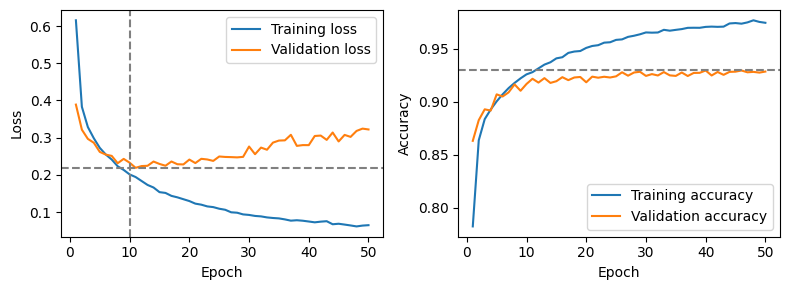

In [15]:
def plotMetrics(metrics, ax, ycolumns, legend, ylabel):
    if ylabel == 'Loss':
        best_val_epoch = metrics[ycolumns[1]].argmin()
    else:
        best_val_epoch = metrics[ycolumns[1]].argmax()
    best_val_metric = metrics[ycolumns[1]][best_val_epoch]

    ax = metrics.plot(x='Epoch', y=ycolumns, ax=ax)
    ax.axhline(best_val_metric, linestyle='--', color='grey')
    if ylabel == 'Loss':
        ax.axvline(best_val_epoch, linestyle='--', color='grey')
    ax.legend(legend)
    ax.set_ylabel(ylabel)

metrics = pd.DataFrame(history.history)
metrics['Epoch'] = [e + 1 for e in history.epoch]
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
plotMetrics(metrics, axes[0], ['loss', 'val_loss'],
            ['Training loss', 'Validation loss'], 'Loss')
plotMetrics(metrics, axes[1], ['accuracy', 'val_accuracy'],
            ['Training accuracy', 'Validation accuracy'], 'Accuracy')
plt.tight_layout()
plt.show()

Epoch 1/20


235/235 - 5s - 20ms/step - accuracy: 0.7776 - loss: 0.6285 - val_accuracy: 0.8536 - val_loss: 0.3906


Epoch 2/20


235/235 - 4s - 16ms/step - accuracy: 0.8569 - loss: 0.3986 - val_accuracy: 0.8813 - val_loss: 0.3264


Epoch 3/20


235/235 - 4s - 16ms/step - accuracy: 0.8776 - loss: 0.3454 - val_accuracy: 0.8930 - val_loss: 0.2921


Epoch 4/20


235/235 - 4s - 17ms/step - accuracy: 0.8875 - loss: 0.3128 - val_accuracy: 0.8991 - val_loss: 0.2743


Epoch 5/20


235/235 - 5s - 20ms/step - accuracy: 0.8957 - loss: 0.2931 - val_accuracy: 0.9020 - val_loss: 0.2643


Epoch 6/20


235/235 - 4s - 16ms/step - accuracy: 0.9014 - loss: 0.2711 - val_accuracy: 0.9079 - val_loss: 0.2501


Epoch 7/20


235/235 - 4s - 16ms/step - accuracy: 0.9077 - loss: 0.2553 - val_accuracy: 0.9114 - val_loss: 0.2399


Epoch 8/20


235/235 - 4s - 16ms/step - accuracy: 0.9113 - loss: 0.2419 - val_accuracy: 0.9143 - val_loss: 0.2396


Epoch 9/20


235/235 - 4s - 16ms/step - accuracy: 0.9161 - loss: 0.2301 - val_accuracy: 0.9118 - val_loss: 0.2363


Epoch 10/20


235/235 - 4s - 17ms/step - accuracy: 0.9192 - loss: 0.2187 - val_accuracy: 0.9142 - val_loss: 0.2406


Epoch 11/20


235/235 - 4s - 18ms/step - accuracy: 0.9238 - loss: 0.2072 - val_accuracy: 0.9186 - val_loss: 0.2239


Epoch 12/20


235/235 - 4s - 18ms/step - accuracy: 0.9250 - loss: 0.1997 - val_accuracy: 0.9173 - val_loss: 0.2325


Epoch 13/20


235/235 - 4s - 16ms/step - accuracy: 0.9295 - loss: 0.1910 - val_accuracy: 0.9195 - val_loss: 0.2276


Epoch 14/20


235/235 - 4s - 16ms/step - accuracy: 0.9322 - loss: 0.1803 - val_accuracy: 0.9214 - val_loss: 0.2283


Epoch 15/20


235/235 - 4s - 15ms/step - accuracy: 0.9343 - loss: 0.1744 - val_accuracy: 0.9243 - val_loss: 0.2216


Epoch 16/20


235/235 - 4s - 15ms/step - accuracy: 0.9368 - loss: 0.1674 - val_accuracy: 0.9212 - val_loss: 0.2268


Epoch 17/20


235/235 - 4s - 16ms/step - accuracy: 0.9390 - loss: 0.1601 - val_accuracy: 0.9245 - val_loss: 0.2157


Epoch 18/20


235/235 - 4s - 16ms/step - accuracy: 0.9399 - loss: 0.1569 - val_accuracy: 0.9272 - val_loss: 0.2159


Epoch 19/20


235/235 - 4s - 15ms/step - accuracy: 0.9431 - loss: 0.1488 - val_accuracy: 0.9268 - val_loss: 0.2178


Epoch 20/20


235/235 - 4s - 16ms/step - accuracy: 0.9460 - loss: 0.1423 - val_accuracy: 0.9254 - val_loss: 0.2237


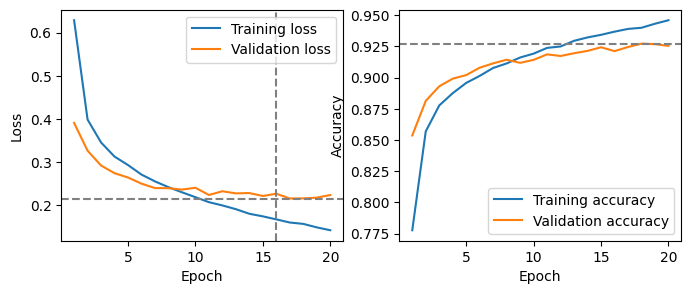

In [16]:
# retrain model for 20 epochs
model = model_cloned
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=256, epochs=20,
        validation_data=(test_images, test_labels_ohe), verbose=2)

metrics = pd.DataFrame(history.history)
metrics['Epoch'] = [e + 1 for e in history.epoch]
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
plotMetrics(metrics, axes[0], ['loss', 'val_loss'],
            ['Training loss', 'Validation loss'], 'Loss')
plotMetrics(metrics, axes[1], ['accuracy', 'val_accuracy'],
            ['Training accuracy', 'Validation accuracy'], 'Accuracy')

In [17]:
propensities = model.predict(test_images, verbose=0)
propensities[:5].round(3)

# convert to class using winner takes all
predClass = propensities.argmax(axis=1)
predClass[:5]

# confusion matrix
mlba.classificationSummary(y_true=test_labels, y_pred=predClass)

Confusion Matrix (Accuracy 0.9254)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9
     0 892   0  17   9   1   1  74   0   6   0
     1   2 981   0  11   1   0   5   0   0   0
     2  14   0 883   6  37   0  58   0   2   0
     3  11   1   8 937  15   0  27   0   1   0
     4   0   0  52  28 855   0  64   0   1   0
     5   0   0   0   0   0 989   0   6   0   5
     6 102   1  48  22  37   0 787   0   3   0
     7   0   0   0   0   0  10   0 970   0  20
     8   1   0   2   3   1   3   2   1 987   0
     9   0   0   0   0   0   4   0  23   0 973
